In [25]:
import torch
from torch.utils.data import Dataset,DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MnistDataset(Dataset):
    data = pd.read_csv("mnist_train.csv", header=None)
    def __init__(self):
        super().__init__()
        
        self.array = MnistDataset.data.to_numpy()

        # self.dataset -> numpy
    
    def __len__(self):
        return len(self.array)

    def __getitem__(self, index) :
        target = self.array[index,0]
        boolean_indexing = np.zeros(10)
        boolean_indexing[target] = 1.0
        return torch.FloatTensor(self.array[index,1:].reshape(28,28)/255.0),torch.FloatTensor(boolean_indexing)
    def plot_img(self,index):
        data = self.array[index,1:].reshape(28,28)
        plt.figure(figsize=(3,3))
        plt.imshow(data,cmap='Blues')



In [26]:
mnistdataset = MnistDataset()

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

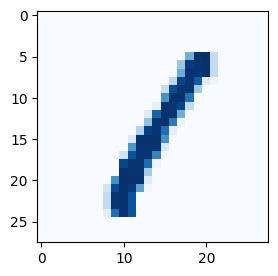

In [27]:
print(mnistdataset[3])
mnistdataset.plot_img(3)

In [58]:
class myView(torch.nn.Module):
    def __init__(self,shape):
        super().__init__()
        self.shape = shape,
    def forward(self,x):
        return x.view(*self.shape)
    #이게 되려면, x는 뭐지?

In [59]:
# Discriminator

# model -> conv2d
# optim
# loss
# train
# loss hist
from torch.nn import BCELoss
from torch.optim import Adam

class D(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(1,10,5,2),
            torch.nn.LeakyReLU(0.02),
            torch.nn.BatchNorm2d(10),
            
            torch.nn.Conv2d(10,10,3,2),
            torch.nn.LeakyReLU(0.02),
            torch.nn.BatchNorm2d(10),

            myView((250)),
            torch.nn.Linear(250,10),            
            torch.nn.Sigmoid()
        )
        self.optimizer = Adam(self.parameters(),lr=0.0002)
        self.loss_fn = BCELoss()
        self.loss_hist = []
        self.counter=0

    def forward(self,x):
        return self.model(x)
    def train(self,x,target): #(1,1,28,28)로 받음 ->rgb면 transpose해주고 (batchsize,3,h,w)로 해주겠네?
        self.counter+=1
        
        self.optimizer.zero_grad()
        y_pred = self.model(x)
        loss = self.loss_fn(y_pred,target) # target은 boolean indexing 가능하게
        loss.backward()
        self.optimizer.step()

        self.loss_hist.append(loss.item())
        if self.counter %100 ==0:
            print(f'iter {self.counter}, loss: {self.loss_hist[-1]}')
    



In [60]:
dataloader = DataLoader(mnistdataset,1)

d = D()

for data,target in dataloader:
    d.train(data.view(-1,1,28,28),target.view(-1))

iter 100, loss: 0.37882906198501587
iter 200, loss: 0.4101315438747406
iter 300, loss: 0.3353221118450165
iter 400, loss: 0.29799288511276245
iter 500, loss: 0.2552087903022766
iter 600, loss: 0.22562828660011292
iter 700, loss: 0.29445356130599976
iter 800, loss: 0.23623552918434143
iter 900, loss: 0.36321061849594116
iter 1000, loss: 0.24973657727241516
iter 1100, loss: 0.14085806906223297
iter 1200, loss: 0.22672784328460693
iter 1300, loss: 0.18900689482688904
iter 1400, loss: 0.08725627511739731
iter 1500, loss: 0.0816589966416359
iter 1600, loss: 0.11779574304819107
iter 1700, loss: 0.061874061822891235
iter 1800, loss: 0.10278959572315216
iter 1900, loss: 0.061141688376665115
iter 2000, loss: 0.09836773574352264
iter 2100, loss: 0.09903436154127121
iter 2200, loss: 0.10290338099002838
iter 2300, loss: 0.14349444210529327
iter 2400, loss: 0.056196559220552444
iter 2500, loss: 0.06639297306537628
iter 2600, loss: 0.054381974041461945
iter 2700, loss: 0.13586491346359253
iter 2800,

In [65]:
class MnistDatasetTest(Dataset):
    def __init__(self,file_path):
        super().__init__()
        self.dataset = pd.read_csv(file_path, header=None)
        self.array = self.dataset.to_numpy()

        # self.dataset -> numpy
    
    def __len__(self):
        return len(self.array)

    def __getitem__(self, index) :
        target = self.array[index,0]
        boolean_indexing = np.zeros(10)
        boolean_indexing[target] = 1.0
        return self.array[index,0],torch.FloatTensor(self.array[index,1:].reshape(28,28)/255.0),torch.FloatTensor(boolean_indexing)
    def plot_img(self,index):
        data = self.array[index,1:].reshape(28,28)
        plt.figure(figsize=(3,3))
        plt.imshow(data,cmap='Blues')

In [66]:
mnist_test_dataset = MnistDatasetTest('mnist_test.csv')

In [67]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = d.forward(image_data_tensor.view(1,1,28,28)).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)

9721 10000 0.9721
